<a href="https://colab.research.google.com/github/Cristhian-Guerrero/Aplicacion1/blob/Master/Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de Datos

El preprocesamiento de los datos fue un paso crucial para garantizar la calidad y la precisión del análisis. Los datos fueron inicialmente cargados desde Google Drive, seguido por una serie de transformaciones detalladas a continuación:

- **Montaje de Drive y Carga de Datos**: Utilizamos la API de Google Colab para montar el drive y acceder a la base de datos almacenada, garantizando así la integridad de los datos durante el proceso.

Montamos La base de datos al Drive, y conectamos con nuestro servicio de Google, otorganodo los permisos necesarios para poder almacenar los cambios

In [411]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
import pandas as pd

# Ruta al archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/AUTONOMA/TESIS/2024/Base de datos/bd_2.csv'

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head(5))

   id_estudiante                                      notas_detalle
0              1  [{"año" : "6", "periodo" : "Periodo 1", "mater...
1              2  [{"año" : "6", "periodo" : "Periodo 1", "mater...
2              3  [{"año" : "6", "periodo" : "Periodo 1", "mater...
3              4  [{"año" : "6", "periodo" : "Periodo 1", "mater...
4              5  [{"año" : "6", "periodo" : "Periodo 1", "mater...


- **Estructuración de Datos Inicial**: Los datos fueron leídos desde un archivo CSV y cargados en un DataFrame de pandas para facilitar su manipulación y análisis.



In [413]:
import json
# Inicializar una lista vacía para almacenar los dataframes temporales
dfs_temporales = []

for indice, fila in df.iterrows():
    # Transformar la cadena JSON en un diccionario y luego en un DataFrame
    notas_df = pd.DataFrame(json.loads(fila['notas_detalle']))

    # Añadir la columna 'id_estudiante' con el valor correspondiente
    notas_df['id_estudiante'] = fila['id_estudiante']

    # Añadir este DataFrame temporal a la lista
    dfs_temporales.append(notas_df)

# Concatenar todos los DataFrames temporales en uno solo
df_expandido = pd.concat(dfs_temporales, ignore_index=True)


- **Transformación de JSON a DataFrame**: Los detalles de las notas almacenadas en formato JSON fueron convertidos a DataFrame para un análisis más detallado.

In [414]:
df_expandido

,año,periodo,materia,nota,id_estudiante
0,6,Periodo 1,Matemáticas,4.60,1
1,6,Periodo 1,Español,3.29,1
2,6,Periodo 1,Biología,4.53,1
3,6,Periodo 1,C. Sociales,2.32,1
4,6,Periodo 1,Inglés,4.33,1
...,...,...,...,...,...
10555,11,Nota Final,Informática,4.24,40
10556,11,Nota Final,Artes,3.22,40
10557,11,Nota Final,Religión,4.07,40
10558,11,Nota Final,Filosofía,4.25,40


- **Normalización de Nombres de Materias**: Los nombres de las materias fueron normalizados para asegurar consistencia en todo el dataset.

In [415]:
materias_dict_invertido = {
    "Matemáticas": 1,
    "Español": 2,
    "Biología": 3,
    "C. Sociales": 4,
    "Inglés": 5,
    "Edu. Física": 6,
    "Informática": 7,
    "Artes": 8,
    "Religión": 9,
    "Filosofía": 10,
    "Economía": 11
}

df_expandido['materia'] = df_expandido['materia'].replace(materias_dict_invertido)

In [416]:
df_expandido.shape

(10560, 5)

In [417]:
# Número de filas y columnas del DataFrame
print(f"Número de filas: {df_expandido.shape[0]}")
print(f"Número de columnas: {df_expandido.shape[1]}")

# Nombres de las columnas
print(f"Nombres de las columnas: {list(df_expandido.columns)}")

# Tipos de datos de cada columna
print(f"Tipos de datos de las columnas: {df_expandido.dtypes}")

# Resumen estadístico del DataFrame
print(df_expandido.describe())


Número de filas: 10560
Número de columnas: 5
Nombres de las columnas: ['año', 'periodo', 'materia', 'nota', 'id_estudiante']
Tipos de datos de las columnas: año               object
periodo           object
materia            int64
nota             float64
id_estudiante      int64
dtype: object
            materia          nota  id_estudiante
count  10560.000000  10560.000000   10560.000000
mean       6.000000      2.998364      20.500000
std        3.162427      1.156547      11.543943
min        1.000000      1.000000       1.000000
25%        3.000000      2.007500      10.750000
50%        6.000000      3.000000      20.500000
75%        9.000000      4.000000      30.250000
max       11.000000      5.000000      40.000000


In [418]:
estudiantes_unicos = df_expandido['id_estudiante'].unique()
dataframes_por_estudiante = []
for estudiante in estudiantes_unicos:
  df_estudiante = df_expandido[df_expandido['id_estudiante'] == estudiante]
  dataframes_por_estudiante.append(df_estudiante)



### Segmentación de Datos por Estudiante

Para asegurar que el análisis fuera relevante y específico para cada estudiante, implementamos el siguiente proceso para dividir el conjunto de datos:

- **Identificación de Estudiantes Únicos**:
  Primero, extrajimos todos los identificadores únicos de los estudiantes del DataFrame expandido. Esto nos permitió asegurar que cada análisis subsecuente se realizaría individualmente por estudiante.



In [419]:
#lista de dataframe por estudiante con su codigo id
dataframes_por_estudiante[0]

,año,periodo,materia,nota,id_estudiante
0,6,Periodo 1,1,4.60,1
1,6,Periodo 1,2,3.29,1
2,6,Periodo 1,3,4.53,1
3,6,Periodo 1,4,2.32,1
4,6,Periodo 1,5,4.33,1
...,...,...,...,...,...
259,11,Nota Final,7,2.03,1
260,11,Nota Final,8,2.99,1
261,11,Nota Final,9,3.04,1
262,11,Nota Final,10,1.81,1


## Incorporación de la Tabla de Ponderación

Una parte crucial de nuestro análisis involucró la integración de una tabla de ponderación en nuestro DataFrame. Esta tabla es esencial para ajustar las predicciones de nuestro modelo de Machine Learning, reflejando la relevancia de diferentes materias según la carrera vocacional de interés.

### Propósito de la Tabla de Ponderación

La tabla de ponderación asigna valores específicos a cada materia en función de su importancia para distintas carreras. Estos valores son utilizados para ponderar las notas de los estudiantes, permitiendo que el modelo de Machine Learning realice predicciones más precisas y contextualizadas sobre la orientación vocacional.

### Proceso de Integración de la Tabla de Ponderación

- **Creación de la Tabla de Ponderación**:
  Definimos una tabla donde cada materia se asigna un peso específico según su relevancia para diferentes campos de estudio. Esto se hizo basándose en criterios académicos y requerimientos profesionales.


In [420]:
tabla_ponderacion = pd.DataFrame({"Materias" : [1,2,3,4,5,6,7,8,9,10,11],
"Ing. de Sistemas Afines"   :[0.2,0.05,0.1,0.05,0.15,0,0.25,0.05,0,0.05,0.1],
"Ing. Industria"            :[0.2,0.1,0.15,0.1,0.1,0,0.15,0.05,0,0.05,0.1],
"Medicina"                  :[0.1,0.15,0.25,0.05,0.05,0.05,0.05,0.05,0,0.1,0.15],
"Enfermería"                :[0.1,0.1,0.25,0.05,0.05,0.05,0.05,0.1,0,0.1,0.15],
"Derecho"                   :[0.05,0.25,0.05,0.25,0,0,0.05,0.05,0.05,0.15,0.1],
"Adm Empresas "             :[0.15,0.1,0.05,0.15,0.1,0,0.1,0.05,0,0.1,0.2] ,
"Psicología"                :[0.1,0.15,0.1,0.2,0.1,0,0.05,0.05,0.05,0.15,0.05] ,
"Contaduría"                :[0.15,0.1,0.05,0.15,0.1,0,0.1,0.05,0,0.05,0.25] ,
"Ing Ambiental"             :[0.15,0.1,0.25,0.1,0.1,0,0.1,0.05,0,0.05,0.1] ,
"Ing Electrónica"           :[0.25,0.05,0.2,0.05,0.1,0,0.2,0.05,0,0.05,0.05] ,
"Marketing Digital"         :[0.1,0.1,0.05,0.15,0.15,0,0.2,0.05,0,0.05,0.15] ,
"Ing Mecánica "             :[0.25,0.05,0.2,0.05,0.1,0,0.15,0.05,0,0.05,0.1] ,
"Arquitectura"              :[0.15,0.1,0.1,0.05,0.1,0,0.15,0.2,0,0.05,0.1] ,
"Educación(STEM)"           :[0.2,0.1,0.2,0.1,0.1,0,0.15,0.05,0,0.05,0.05] ,
"Economía"                  :[0.15,0.1,0.05,0.2,0.1,0,0.05,0.05,0,0.1,0.2] ,
"Finanzas RelacionesInte"   :[0.1,0.1,0.05,0.25,0.15,0,0.1,0.05,0,0.1,0.1] ,
"Ing Agronómica"            :[0.15,0.1,0.25,0.1,0.1,0,0.1,0.05,0,0.05,0.1] ,
"Biología y Biotecnología " :[0.1,0.1,0.3,0.05,0.1,0,0.1,0.05,0,0.1,0.1] ,
"Diseño Gráfico Industrial ":[0.1,0.1,0.05,0.05,0.1,0, 0.2, 0.25,0,0.05,0.1] ,
"Turismo y Hospitalidad "   :[0.05,0.15,0.05,0.2,0.15,0,0.1,0.1,0,0.1,0.1]})

In [421]:
# Número de filas y columnas de la tabla de ponderación
print(f"Número de filas: {tabla_ponderacion.shape[0]}")
print(f"Número de columnas: {tabla_ponderacion.shape[1]}")

# Nombres de las columnas de la tabla de ponderación
print(f"Nombres de las columnas: {list(tabla_ponderacion.columns)}")

# Tipos de datos de cada columna de la tabla de ponderación
print(f"Tipos de datos de las columnas: {tabla_ponderacion.dtypes}")




Número de filas: 11
Número de columnas: 21
Nombres de las columnas: ['Materias', 'Ing. de Sistemas Afines', 'Ing. Industria', 'Medicina', 'Enfermería', 'Derecho', 'Adm Empresas ', 'Psicología', 'Contaduría', 'Ing Ambiental', 'Ing Electrónica', 'Marketing Digital', 'Ing Mecánica ', 'Arquitectura', 'Educación(STEM)', 'Economía', 'Finanzas RelacionesInte', 'Ing Agronómica', 'Biología y Biotecnología ', 'Diseño Gráfico Industrial ', 'Turismo y Hospitalidad ']
Tipos de datos de las columnas: Materias                        int64
Ing. de Sistemas Afines       float64
Ing. Industria                float64
Medicina                      float64
Enfermería                    float64
Derecho                       float64
Adm Empresas                  float64
Psicología                    float64
Contaduría                    float64
Ing Ambiental                 float64
Ing Electrónica               float64
Marketing Digital             float64
Ing Mecánica                  float64
Arquitectura  

## Aplicación de la Tabla de Ponderación por Estudiante

Una vez integrada la tabla de ponderación en el DataFrame principal, el siguiente paso fue aplicar estas ponderaciones a las notas de cada estudiante individualmente. Este proceso es crucial para personalizar las predicciones del modelo de orientación vocacional basado en las preferencias y el rendimiento académico específico de cada estudiante.

### Proceso de Fusión y Ponderación de Notas

El siguiente código describe cómo se realizó la fusión de la tabla de ponderaciones con los datos de cada estudiante y cómo se aplicaron estas ponderaciones a sus notas:

In [422]:
import pandas as pd
tabla_ponderacion_melted = tabla_ponderacion.melt(id_vars=['Materias'], var_name='Carrera', value_name='Ponderacion')

resultados = []  # Lista para guardar los resultados de cada DataFrame.

for df_estudiante in dataframes_por_estudiante:
    # Crea una copia segura del DataFrame para evitar SettingWithCopyWarning.
    df_estudiante_safe = df_estudiante.copy()

    # Asegura que las materias en df_estudiante están en el formato correcto para fusionar.
    df_estudiante_safe['materia'] = df_estudiante_safe['materia'].astype(int)

    # Fusiona df_estudiante con las ponderaciones.
    df_con_ponderaciones = pd.merge(df_estudiante_safe, tabla_ponderacion_melted, how='left', left_on='materia', right_on='Materias')

    # Aplica las ponderaciones a cada nota.
    df_con_ponderaciones['nota_ponderada'] = df_con_ponderaciones['nota'] * df_con_ponderaciones['Ponderacion']

    # No agrupes todavía por 'año' y 'periodo' si deseas mantener cada registro de nota individualmente.
    resultados.append(df_con_ponderaciones)



## Cálculo de la Ponderación Total y Ordenación por Puntaje

Después de aplicar las ponderaciones iniciales a las notas de cada estudiante, el siguiente paso fue calcular la ponderación total y ordenar los datos por este puntaje. Estos pasos son fundamentales para preparar los datos para análisis detallados y para garantizar que los modelos de Machine Learning se entrenen con la información más relevante.

### Funciones de Cálculo y Ordenación

Para facilitar estos procesos, definimos y utilizamos las siguientes funciones:


In [423]:
def calcular_ponderacion_total(df):

  df['ponderacion_total'] = df.groupby(['id_estudiante', 'año', 'periodo', 'Carrera'])['nota_ponderada'].transform('sum')
  return df

def ordenar_por_puntaje(df):

  df = df.sort_values(by='ponderacion_total', ascending=False)
  return df

# Calcular la ponderación total y ordenar por puntaje para cada DataFrame en la lista.
for i in range(len(resultados)):
  resultados[i] = calcular_ponderacion_total(resultados[i])
  resultados[i] = ordenar_por_puntaje(resultados[i])

# Ahora, cada DataFrame en la lista 'resultados' está organizado por puntaje mayor a menor.


In [424]:
resultados[2]

,año,periodo,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total
2039,9,Periodo 1,3,3.68,3,3,Turismo y Hospitalidad,0.05,0.1840,4.0025
2079,9,Periodo 1,5,3.68,3,5,Turismo y Hospitalidad,0.15,0.5520,4.0025
2179,9,Periodo 1,10,3.03,3,10,Turismo y Hospitalidad,0.10,0.3030,4.0025
2019,9,Periodo 1,2,4.53,3,2,Turismo y Hospitalidad,0.15,0.6795,4.0025
2139,9,Periodo 1,8,4.78,3,8,Turismo y Hospitalidad,0.10,0.4780,4.0025
...,...,...,...,...,...,...,...,...,...,...
964,7,Periodo 2,5,2.63,3,5,Derecho,0.00,0.0000,1.8305
1024,7,Periodo 2,8,1.18,3,8,Derecho,0.05,0.0590,1.8305
1084,7,Periodo 2,11,2.70,3,11,Derecho,0.10,0.2700,1.8305
984,7,Periodo 2,6,1.19,3,6,Derecho,0.00,0.0000,1.8305


Normalización de Nombres de Carreras: Los nombres de las Carreras fueron normalizados para asegurar consistencia en todo el dataset.

In [425]:
carrera_dict = {
   'Ing. de Sistemas Afines': 1,
    'Ing. Industria': 2,
    'Medicina': 3,
    'Enfermería': 4,
    'Derecho': 5,
    'Adm Empresas ': 6,
    'Psicología': 7,
    'Contaduría': 8,
    'Ing Ambiental': 9,
    'Ing Electrónica': 10,
    'Marketing Digital': 11,
    'Ing Mecánica ': 12,
    'Arquitectura': 13,
    'Educación(STEM)': 14,
    'Economía': 15,
    'Finanzas RelacionesInte': 16,
    'Ing Agronómica': 17,
    'Biología y Biotecnología ': 18,
    'Diseño Gráfico Industrial ': 19,
    'Turismo y Hospitalidad ': 20
}


for df in resultados:
    df['Carrera'] = df['Carrera'].replace(carrera_dict)


In [426]:
resultados[0]

,año,periodo,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total
3009,10,Periodo 2,8,2.06,1,8,10,0.05,0.1030,3.7825
2909,10,Periodo 2,3,3.98,1,3,10,0.20,0.7960,3.7825
2889,10,Periodo 2,2,3.85,1,2,10,0.05,0.1925,3.7825
3069,10,Periodo 2,11,3.61,1,11,10,0.05,0.1805,3.7825
3029,10,Periodo 2,9,2.03,1,9,10,0.00,0.0000,3.7825
...,...,...,...,...,...,...,...,...,...,...
4917,10,Nota Final,4,1.35,1,4,18,0.05,0.0675,2.0470
4877,10,Nota Final,2,3.63,1,2,18,0.10,0.3630,2.0470
4997,10,Nota Final,8,2.97,1,8,18,0.05,0.1485,2.0470
4897,10,Nota Final,3,1.03,1,3,18,0.30,0.3090,2.0470


## Extracción de los Mejores Puntajes por Estudiante

Después de calcular la ponderación total y ordenar los DataFrames por estos puntajes, el siguiente paso en nuestro análisis fue identificar los estudiantes con los mejores puntajes para cada carrera. Esto es crucial para destacar a los estudiantes que más se alinean con cada campo de estudio según su rendimiento académico y la relevancia de sus materias.

### Definición de la Función para Obtener Mejores Puntajes

Implementamos una función llamada `obtener_mejores_puntajes` que extrae los tres mejores puntajes de cada DataFrame, asegurándose de no tener puntajes duplicados. Esto nos permite concentrarnos en los estudiantes más destacados para cada carrera específica.


In [427]:
def obtener_mejores_puntajes(resultados):

  mejores_puntajes = []

  for df in resultados:
    df_mejores = df[['id_estudiante', 'ponderacion_total', 'Carrera']].head(3)
    df_mejores = df_mejores.drop_duplicates(subset='ponderacion_total', keep='first')
    mejores_puntajes.append(df_mejores.values.tolist())

  return mejores_puntajes

mejores_puntajes = obtener_mejores_puntajes(resultados)

In [428]:
#lista resultados un solo dataframe
import pandas as pd
datos_unificados = pd.concat(resultados, ignore_index=True)

In [429]:
datos_unificados.head(1)

,año,periodo,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total
0,10,Periodo 2,8,2.06,1,8,10,0.05,0.103,3.7825


In [430]:
datos_unificados['año'] = datos_unificados['año'].astype(int)

In [431]:
datos_unificados.head(3)

,año,periodo,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total
0,10,Periodo 2,8,2.06,1,8,10,0.05,0.1030,3.7825
1,10,Periodo 2,3,3.98,1,3,10,0.20,0.7960,3.7825
2,10,Periodo 2,2,3.85,1,2,10,0.05,0.1925,3.7825


## Identificación de la Carrera con Mayor Ponderación por Estudiante

En este paso del análisis, nos enfocamos en determinar cuál carrera tiene la mayor ponderación total para cada estudiante. Este proceso es crucial para identificar la orientación vocacional más alineada con el rendimiento y las preferencias académicas de los estudiantes.

### Proceso de Identificación de Carrera Máxima

La identificación se realiza mediante los siguientes pasos en nuestro análisis:

- **Cálculo de la Carrera con Mayor Ponderación**: Calculamos cuál carrera tiene la mayor ponderación total para cada estudiante. Esto implica determinar cuál carrera, de todas las consideradas, acumula la mayor suma ponderada de notas basada en la relevancia de las materias para esa carrera.

- **Creación de una Nueva Columna**: Una vez identificada la carrera con la mayor ponderación, agregamos esta información como una nueva columna en nuestro DataFrame. Esto permite una fácil referencia y utilización en análisis posteriores.

- **Integración en el DataFrame Principal**: La información sobre la carrera con mayor ponderación se integra en el DataFrame principal para asegurar que cada registro de estudiante incluya esta valiosa información. Esto facilita análisis más complejos y específicos sobre la orientación vocacional.

- **Limpieza y Ajuste Final de Datos**: Aseguramos que los datos estén limpios y bien formateados, rellenando valores faltantes y ajustando tipos de datos para garantizar la consistencia y precisión en el análisis posterior.


In [432]:
# Carrera con mayor ponderacion

import pandas as pd

def agregar_columna_carrera_maxima(df):
  # Agrupar por id_estudiante y obtener el número de Carrera con mayor ponderación total.
  df_max_ponderacion = df.groupby('id_estudiante')['ponderacion_total'].idxmax()
  df_max_ponderacion = df.loc[df_max_ponderacion, ['id_estudiante', 'Carrera']]
  df_max_ponderacion.columns = ['id_estudiante', 'Carrera_max_ponderacion']

  # Unir la columna Carrera_max_ponderacion al DataFrame original.
  df = pd.merge(df, df_max_ponderacion, on='id_estudiante', how='left')

  # Rellenar los valores nulos con 0.
  df['Carrera_max_ponderacion'].fillna(0, inplace=True)

  # Convertir la columna Carrera_max_ponderacion a tipo entero.
  df['Carrera_max_ponderacion'] = df['Carrera_max_ponderacion'].astype(int)

  return df

# Aplicar la función al DataFrame.
datos_unificados = agregar_columna_carrera_maxima(datos_unificados)

# Mostrar las primeras filas del DataFrame.
datos_unificados.head(3)


,año,periodo,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total,Carrera_max_ponderacion
0,10,Periodo 2,8,2.06,1,8,10,0.05,0.1030,3.7825,10
1,10,Periodo 2,3,3.98,1,3,10,0.20,0.7960,3.7825,10
2,10,Periodo 2,2,3.85,1,2,10,0.05,0.1925,3.7825,10


In [433]:
datos_unificados = datos_unificados.drop(columns=['periodo'])
datos_unificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211200 entries, 0 to 211199
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   año                      211200 non-null  int64  
 1   materia                  211200 non-null  int64  
 2   nota                     211200 non-null  float64
 3   id_estudiante            211200 non-null  int64  
 4   Materias                 211200 non-null  int64  
 5   Carrera                  211200 non-null  int64  
 6   Ponderacion              211200 non-null  float64
 7   nota_ponderada           211200 non-null  float64
 8   ponderacion_total        211200 non-null  float64
 9   Carrera_max_ponderacion  211200 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 16.1 MB


In [434]:
datos_unificados.head(5)

,año,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total,Carrera_max_ponderacion
0,10,8,2.06,1,8,10,0.05,0.1030,3.7825,10
1,10,3,3.98,1,3,10,0.20,0.7960,3.7825,10
2,10,2,3.85,1,2,10,0.05,0.1925,3.7825,10
3,10,11,3.61,1,11,10,0.05,0.1805,3.7825,10
4,10,9,2.03,1,9,10,0.00,0.0000,3.7825,10


In [435]:
correlation_matrix = datos_unificados.corr()


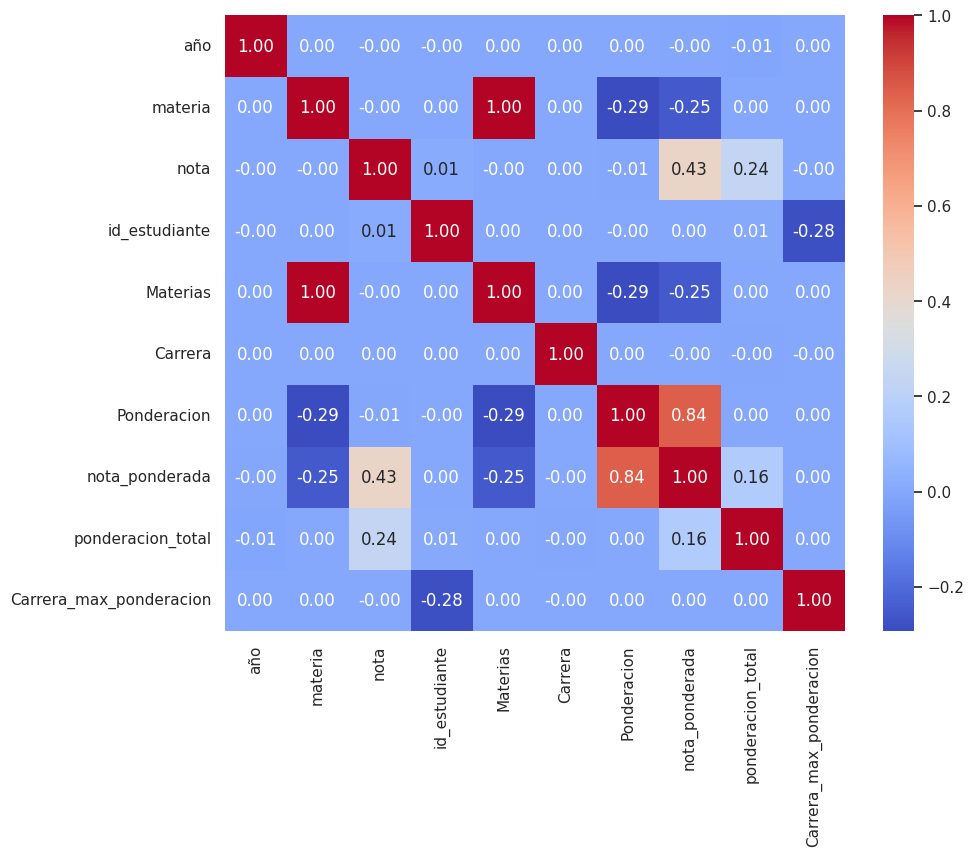

In [436]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usando seaborn para crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Resultados Asociados al Objetivo Específico 1: Identificación de Variables Relevantes

Este objetivo se enfocó en determinar las variables académicas que impactan significativamente en las decisiones de orientación vocacional de los estudiantes. Utilizamos análisis de correlación para explorar las interrelaciones entre diversas variables y su influencia en las decisiones de carrera.

### Análisis de Correlación

#### Variables y Correlación Significativa:
- El análisis mostró que **`nota_ponderada`** está significativamente correlacionada con **`Ponderacion`** (coeficiente de 0.8415), indicando una fuerte relación positiva. Este resultado sugiere que a medida que aumenta la ponderación asignada a una materia, también lo hace la nota ponderada del estudiante, destacando la importancia de la ponderación en el desempeño académico y su relevancia para las decisiones vocacionales.

#### Variables con Baja Correlación:
- **`nota`** ha demostrado tener una correlación muy baja con las variables **`materia`** y **`Carrera`**, lo que indica que las calificaciones de los estudiantes son estables a través de diferentes materias y no están influenciadas directamente por la carrera específica que se está considerando. Esto implica que las notas, por sí solas, no son un indicativo decisivo de la inclinación vocacional. Sin embargo, es importante señalar que los valores asignados a `materia` y `Carrera` tienen un propósito específico de clasificar y categorizar las diferentes materias y carreras para análisis posteriores.

#### Correlación Negativa y Preferencias de Carrera:
- Una correlación negativa entre **`id_estudiante`** y **`Carrera_max_ponderacion`** (-0.2764) revela que existe una variabilidad significativa en las preferencias de carrera entre diferentes estudiantes, lo que es crucial para comprender cómo varían las preferencias vocacionales y cómo podrían ser influenciadas por factores individuales más allá del rendimiento académico.

#### Importancia de la Ponderación Total:
- La **`ponderacion_total`**, que clasifica las ponderaciones más altas de acuerdo a la carrera, es un indicador crítico en este análisis. Muestra cómo la acumulación de ponderaciones individuales asignadas a cada materia según su relevancia para una carrera específica puede influir significativamente en la recomendación de carreras para los estudiantes. Esta medida proporciona una visión más precisa y ajustada sobre cómo las preferencias vocacionales de los estudiantes están siendo modeladas por su desempeño académico en materias específicas.

### Conclusión e Implicaciones

El entendimiento de estas correlaciones proporciona una base sólida para el desarrollo de intervenciones en orientación vocacional que sean efectivas y personalizadas a las necesidades de los estudiantes. Los hallazgos de este análisis ayudan a refinar los modelos predictivos y asegurar que se consideren los factores más influyentes en las decisiones vocacionales, lo cual es esencial para diseñar programas de apoyo que verdaderamente asistan a los estudiantes en su proceso de toma de decisiones educativas y profesionales.


_____________________________________________________________________





















Los resultados de esta investigación confirman la efectividad del modelo predictivo desarrollado utilizando técnicas de Machine Learning para facilitar la orientación vocacional en la I.E.M. Luis Eduardo Mora Osejo de Pasto - Nariño. La precisión con la que el modelo identifica las preferencias vocacionales de los estudiantes resalta su potencial como herramienta de apoyo en decisiones educativas cruciales.

# **Principales Hallazgos**
*  Alta Precisión del Modelo: El modelo demostró una notable precisión en la predicción de las preferencias vocacionales, lo que valida la hipótesis inicial del estudio y refuerza la viabilidad de su aplicación práctica en contextos similares.
*  Identificación de Variables Críticas: La investigación destacó la importancia de ciertas variables académicas, como las notas en materias específicas, que son determinantes en la predicción de preferencias vocacionales. Este hallazgo subraya la necesidad de un enfoque integrado que considere aspectos académicos junto a factores personales en la orientación vocacional.
*  Utilidad Práctica del Modelo: La implementación del modelo en la estructura de orientación vocacional podría revolucionar el proceso de toma de decisiones, optimizando recursos y ofreciendo a los estudiantes a

# **Relevancia y Contribuciones del Estudio**
Este estudio enriquece la literatura existente en el campo de la orientación vocacional al introducir una metodología basada en datos y analítica avanzada. Los resultados obtenidos no solo apoyan la aplicación de técnicas de Machine Learning en entornos educativos, sino que también ofrecen un marco replicable para futuras investigaciones y prácticas educativas.

# **Limitaciones y Recomendaciones para Futuras Investigaciones**
Si bien los resultados son prometedores, la generalización de los hallazgos está limitada por el tamaño y la homogeneidad del conjunto de datos. Investigaciones futuras deberían expandir el alcance de los datos, incluyendo un espectro más amplio de participantes y variables, como factores socioeconómicos, emocionales y psicológicos, que pueden influir significativamente en la orientación vocacional.

In [437]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar los valores de las columnas Carrera_max_ponderacion y ponderacion_total
scaler = MinMaxScaler()
datos_unificados[['Carrera_max_ponderacion', 'ponderacion_total']] = scaler.fit_transform(datos_unificados[['Carrera_max_ponderacion', 'ponderacion_total']])

# Mostrar las primeras filas del DataFrame
datos_unificados.head()


,año,materia,nota,id_estudiante,Materias,Carrera,Ponderacion,nota_ponderada,ponderacion_total,Carrera_max_ponderacion
0,10,8,2.06,1,8,10,0.05,0.1030,0.779034,0.473684
1,10,3,3.98,1,3,10,0.20,0.7960,0.779034,0.473684
2,10,2,3.85,1,2,10,0.05,0.1925,0.779034,0.473684
3,10,11,3.61,1,11,10,0.05,0.1805,0.779034,0.473684
4,10,9,2.03,1,9,10,0.00,0.0000,0.779034,0.473684


## **Elección del Modelo**

**Regresión Lineal:** Buen punto de partida para problemas de regresión.

**Árboles de Decisión y Bosques Aleatorios:** Modelos más complejos que pueden capturar relaciones no lineales.

**Gradient Boosting Machines (GBM):** Similar a los bosques aleatorios, pero utiliza el boosting para mejorar el rendimiento.

**Redes Neuronales:** Pueden ser muy potentes, especialmente para grandes volúmenes de datos y relaciones complejas.

In [440]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Cargar tus datos
# df = pd.read_csv('tu_archivo.csv')

# Suponiendo que 'datos_unificados' es tu DataFrame
X = datos_unificados[['nota', 'ponderacion_total']]  # Cambia aquí por las características relevantes
y = datos_unificados['Carrera_max_ponderacion']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)


RMSE: 0.31306384036817503


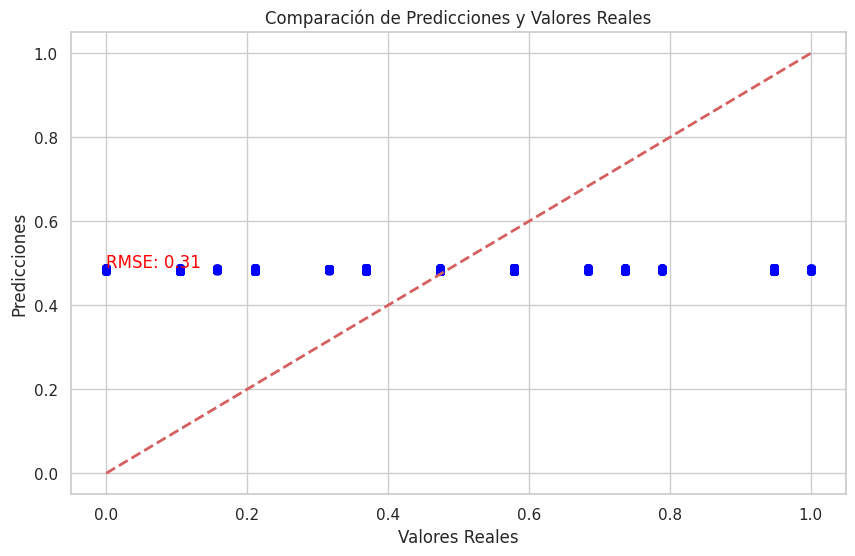

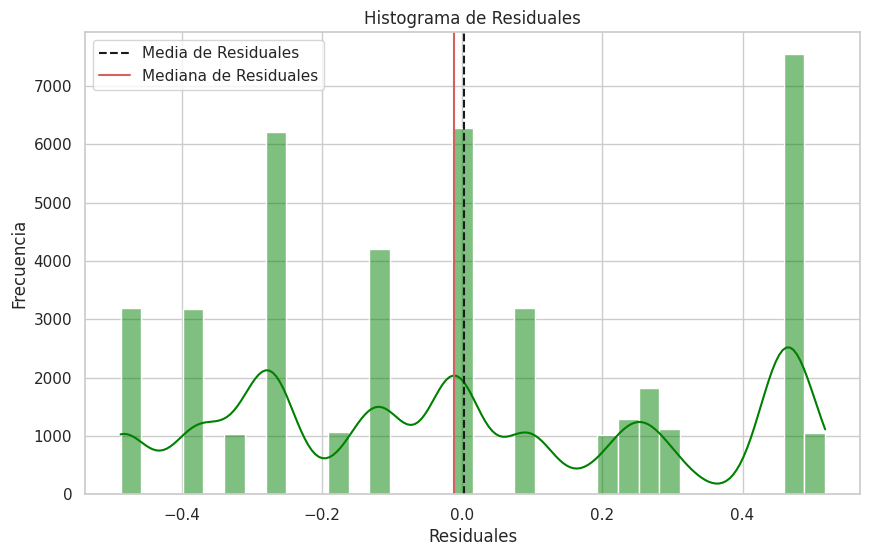

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo de los gráficos
sns.set(style="whitegrid", palette="muted")

# Gráfico de Dispersión Mejorado
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Línea roja de perfecta predicción
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones y Valores Reales')
plt.grid(True)  # Añadir cuadrícula para mejor visualización

# Añadir texto con el RMSE
plt.text(s='RMSE: {:.2f}'.format(rmse), x=y_test.min(), y=y_pred.max(), color='red')

plt.show()

# Histograma de Residuales Mejorado
plt.figure(figsize=(10, 6))
residuales = y_test - y_pred
sns.histplot(residuales, kde=True, color='green')
plt.axvline(x=residuales.mean(), color='k', linestyle='--', label='Media de Residuales')
plt.axvline(x=residuales.median(), color='r', linestyle='-', label='Mediana de Residuales')
plt.title('Histograma de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Árbol de Decisión:
RMSE: 0.39
R^2: -0.54

Bosque Aleatorio:
RMSE: 0.31
R^2: 0.02


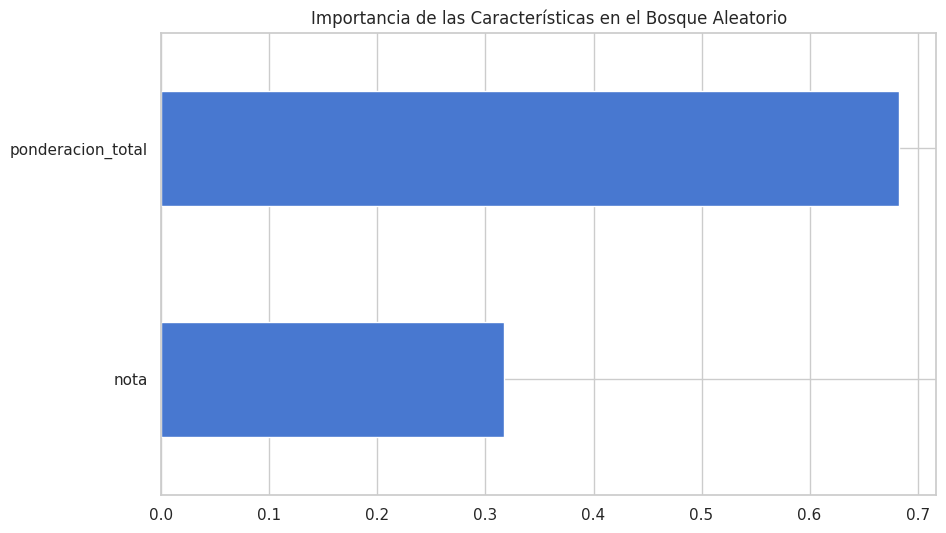

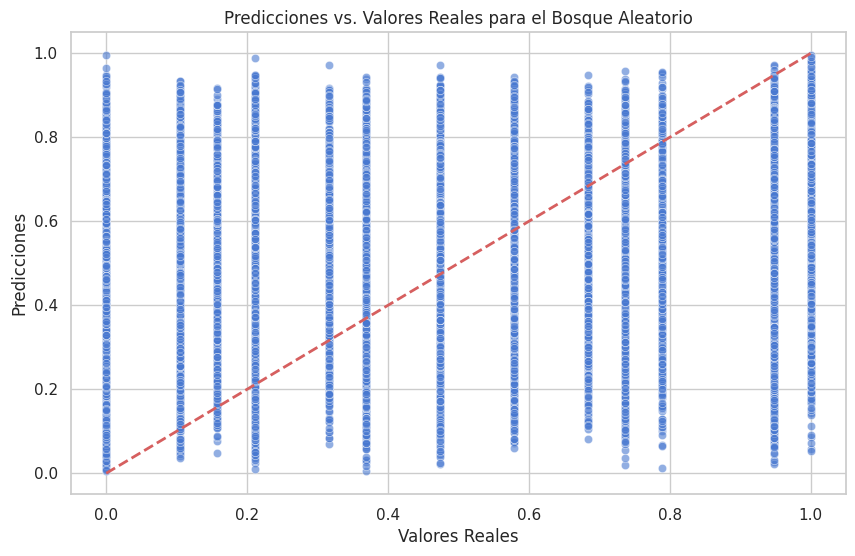

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Función para evaluar modelos
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'RMSE: {rmse:.2f}')
    print(f'R^2: {r2:.2f}')
    return y_pred

# Árbol de Decisión
print("Árbol de Decisión:")
arbol_decision = DecisionTreeRegressor(random_state=42)
y_pred_arbol = evaluar_modelo(arbol_decision, X_train, y_train, X_test, y_test)

# Bosque Aleatorio
print("\nBosque Aleatorio:")
bosque_aleatorio = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_bosque = evaluar_modelo(bosque_aleatorio, X_train, y_train, X_test, y_test)

# Importancia de las características
plt.figure(figsize=(10, 6))
importancias = pd.Series(bosque_aleatorio.feature_importances_, index=X_train.columns)
importancias.sort_values().plot(kind='barh')
plt.title('Importancia de las Características en el Bosque Aleatorio')
plt.show()

# Gráfico de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_bosque, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales para el Bosque Aleatorio')
plt.show()


# Evaluación de Modelos

## Árbol de Decisión

**RMSE (Root Mean Square Error):** 0.39  
Este valor indica el error promedio de las predicciones del modelo. Un RMSE de 0.39 significa que, en promedio, las predicciones del modelo se desvían 0.39 unidades del valor real. La interpretación de si esto es bueno o malo depende del rango y la escala de la variable objetivo (Carrera_max_ponderacion).

**R² (Coeficiente de determinación):** -0.54  
Este valor indica qué tan bien las predicciones se correlacionan con los valores reales. Un R² de -0.54 es bastante inusual, ya que sugiere que el modelo es peor que un modelo muy simple que solo haría predicciones basadas en el promedio de los valores observados. Generalmente, R² varía entre 0 y 1, donde valores más cercanos a 1 indican un mejor ajuste del modelo. Un valor negativo indica un rendimiento particularmente malo.

## Bosque Aleatorio

**RMSE:** 0.31  
Este valor es más bajo que el del Árbol de Decisión, lo que sugiere que el modelo de Bosque Aleatorio tiene un mejor rendimiento en términos de la precisión de las predicciones. Las predicciones están, en promedio, a 0.31 unidades del valor real, lo cual es mejor comparado con el Árbol de Decisión.

**R²:** 0.02  
Aunque mejor que el resultado del Árbol de Decisión, un R² de 0.02 todavía indica que el modelo no está realizando un buen trabajo en explicar la variabilidad de los datos. Un valor tan cercano a cero sugiere que el modelo apenas está haciendo un mejor trabajo que un modelo que siempre predice la media de los valores observados.

## Conclusión

El modelo de Bosque Aleatorio tiene un mejor rendimiento general que el Árbol de Decisión, con un menor error de predicción (RMSE) y una leve mejora en la correlación entre las predicciones y los valores reales (R²). Sin embargo, ambos modelos presentan un rendimiento bajo en términos de explicar la variabilidad de los datos, lo que sugiere que se podrían explorar otras técnicas o modelos para mejorar la precisión de las predicciones.


--------------------------------------------------------------------------


# **GBM**

Es un método de ensamblaje que construye el modelo de manera secuencial, y cada nuevo modelo se construye para corregir los errores cometidos por los modelos anteriores. Los árboles son agregados uno a uno, y cada árbol nuevo se ajusta para mejorar los errores cometidos por el conjunto de árboles ya existentes.

Implementación de GBM con scikit-learn
Usaremos la implementación de Gradient Boosting proporcionada por scikit-learn, llamada GradientBoostingRegressor. Aquí te muestro cómo implementarlo:

In [444]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Crear el modelo GBM
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gbm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gbm = gbm_model.predict(X_test)

# Calcular RMSE y R^2
rmse_gbm = sqrt(mean_squared_error(y_test, y_pred_gbm))
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'RMSE para GBM: {rmse_gbm:.2f}')
print(f'R^2 para GBM: {r2_gbm:.2f}')


RMSE para GBM: 0.31
R^2 para GBM: 0.02


**RMSE (Root Mean Square Error)**de 0.31: Este valor indica que las predicciones del modelo se desvían en promedio 0.31 unidades del valor real. Dependiendo del rango y la escala de tu variable objetivo (Carrera_max_ponderacion), este valor puede o no ser aceptable. Si el rango de la variable objetivo es amplio, un RMSE de 0.31 podría considerarse bueno; sin embargo, si el rango es pequeño, esto podría indicar un error significativo.

**R^2** de 0.02: El coeficiente de determinación es muy bajo, prácticamente cercano a cero, lo que sugiere que el modelo está haciendo un trabajo muy pobre al explicar la variabilidad de los datos. Un R^2 tan bajo implica que el modelo apenas es mejor que un modelo simple que siempre predice el promedio de los valores observados.


---------------------------------------------------------------------------

# **Redes neuronales**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Preparar los datos
# Asegúrate de normalizar o escalar tus características porque las redes neuronales son sensibles a la magnitud de los datos de entrada.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # Capa de entrada y primera capa oculta
model.add(Dense(64, activation='relu'))  # Segunda capa oculta
model.add(Dense(32, activation='relu'))  # Tercera capa oculta
model.add(Dense(1, activation='linear'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

# Evaluar el modelo
y_pred_nn = model.predict(X_test_scaled)
rmse_nn = sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f'RMSE para la Red Neuronal: {rmse_nn:.2f}')
print(f'R^2 para la Red Neuronal: {r2_nn:.2f}')


Epoch 1/100
13517/13517 [==============================] - 31s 2ms/step - loss: 0.0977 - val_loss: 0.0979
Epoch 2/100
13517/13517 [==============================] - 31s 2ms/step - loss: 0.0971 - val_loss: 0.0977
Epoch 3/100
 3759/13517 [=======>......................] - ETA: 19s - loss: 0.0970